In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager


In [5]:
ChromeDriverManager().install()

'/Users/martinreyes/.wdm/drivers/chromedriver/mac64/116.0.5845.140/chromedriver-mac-x64/chromedriver'

In [3]:
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager

url = 'https://www.glassdoor.com/Reviews/AT-and-T-Texas-Reviews-EI_IE613.0,8_IL.9,14_IS1347.htm'

# Set up the Selenium driver with options
options = Options()
options.add_argument('--headless')  # Run in headless mode
driver = webdriver.Chrome(service=Service(webdriver_path), options=options)

# Load the webpage
driver.get(url)


In [8]:
# Install Webdriver
service = Service(ChromeDriverManager().install())
# Create Driver Instance
driver = webdriver.Chrome(service=service)

In [45]:
driver.quit()

In [4]:
# Install Webdriver
service = Service(ChromeDriverManager().install())

In [127]:
# Create Driver Instance
driver = webdriver.Chrome(service=service)

driver.get("""https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm""")

pros = ''
for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
    pros += pro.text
print(len(pros))
cons = ''
for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
    cons += con.text

driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
next_url = driver.current_url

driver.quit()

# Create Driver Instance
driver = webdriver.Chrome(service=service)
driver.get(next_url)

for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
    pros += pro.text

for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
    cons += con.text
print(len(pros2))
print(len(pros))

9769
3204
12973


In [46]:
pros = ''
cons = ''

for i in range(5):
    print(i)
    if i == 0:
        next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

    driver = webdriver.Chrome(service=service)
    driver.get(next_url)
    for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
        pros += pro.text

    for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
        cons += con.text
    
    driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
    next_url = driver.current_url
    driver.quit()

0
1
2
16136


In [47]:
len(cons)

19200

In [235]:
# Install Webdriver
service = Service(ChromeDriverManager().install())

names = []
ratings = []
pros = []
cons = []

# company page 1-30
for page in range(1, 2):
    url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page={page}&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
    driver = webdriver.Chrome(service=service)
    # access company page
    driver.get(url)

    # Find employer name tags
    employer_names = driver.find_elements(By.XPATH, "//h2[@data-test='employer-short-name']")
    # Find employer rating tags
    employer_ratings = driver.find_elements(By.XPATH, "//span[@data-test='rating']")
    # Find employer review link tags
    review_links = driver.find_elements(By.XPATH, '//span[@class="css-u9lko5 euttuq60"]')

    for link in review_links:
        link.click
        # Get company pros and cons
        pros = ''
        cons = ''

        for i in range(5):
            print(i)
            if i == 0:
                next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

            driver = webdriver.Chrome(service=service)
            driver.get(next_url)
            for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
                pros += pro.text

            for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
                cons += con.text

            driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
            next_url = driver.current_url

            driver.quit()
    
    # Extract names and ratings and add them to the lists
    for name, rating in zip(employer_names, employer_ratings):
        names.append(name.text)
        ratings.append(rating.text)

    # Create a DataFrame
    data = {'employer_name': names,
            'rating': ratings}
    df = pd.DataFrame(data)

df        


KeyboardInterrupt



In [70]:
hrefs = []
for ele in driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]'):
    hrefs.append(ele.get_attribute("href"))


In [71]:
hrefs

['https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm',
 'https://www.glassdoor.com/Reviews/Deloitte-Reviews-E2763.htm',
 'https://www.glassdoor.com/Reviews/Walmart-Reviews-E715.htm',
 'https://www.glassdoor.com/Reviews/Target-Reviews-E194.htm',
 'https://www.glassdoor.com/Reviews/McDonald-s-Reviews-E432.htm',
 'https://www.glassdoor.com/Reviews/Infosys-Reviews-E7927.htm',
 'https://www.glassdoor.com/Reviews/Accenture-Reviews-E4138.htm',
 'https://www.glassdoor.com/Reviews/IBM-Reviews-E354.htm',
 'https://www.glassdoor.com/Reviews/Microsoft-Reviews-E1651.htm',
 'https://www.glassdoor.com/Reviews/Tata-Consultancy-Services-Reviews-E13461.htm']

In [85]:
driver.quit()

In [244]:
names = []
ratings = []
review_urls = []

for page in range(1, 101):
    print(page)
    url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page={page}&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
    # access company page
    driver = webdriver.Chrome(service=service)
    driver.get(url)

    # Find employer name tags
    employer_names = driver.find_elements(By.XPATH, "//h2[@data-test='employer-short-name']")
    # Find employer rating tags
    employer_ratings = driver.find_elements(By.XPATH, "//span[@data-test='rating']")
    # Find employer review link tags
    review_links = driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]')
     
    # Extract names and ratings and add them to the lists
    for name, rating, link in zip(employer_names, employer_ratings, review_links):
        names.append(name.text)
        ratings.append(rating.text)
        review_urls.append(link.get_attribute("href"))
    
    driver.quit()
    
    # Create a DataFrame
    data = {'name': names,
            'rating': ratings,
            'url': review_urls}
    
df = pd.DataFrame(data)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


WebDriverException: Message: disconnected: Unable to receive message from renderer
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=116.0.5845.140)
Stacktrace:
0   chromedriver                        0x000000010ba0f638 chromedriver + 5002808
1   chromedriver                        0x000000010ba06a53 chromedriver + 4966995
2   chromedriver                        0x000000010b5b7a57 chromedriver + 449111
3   chromedriver                        0x000000010b59c320 chromedriver + 336672
4   chromedriver                        0x000000010b59c0b1 chromedriver + 336049
5   chromedriver                        0x000000010b59b58d chromedriver + 333197
6   chromedriver                        0x000000010b5c3944 chromedriver + 497988
7   chromedriver                        0x000000010b63f3fc chromedriver + 1004540
8   chromedriver                        0x000000010b6241c3 chromedriver + 893379
9   chromedriver                        0x000000010b5efdf9 chromedriver + 679417
10  chromedriver                        0x000000010b5f0fde chromedriver + 683998
11  chromedriver                        0x000000010b9cc2d9 chromedriver + 4727513
12  chromedriver                        0x000000010b9d12de chromedriver + 4747998
13  chromedriver                        0x000000010b98f2c9 chromedriver + 4477641
14  chromedriver                        0x000000010b9d202d chromedriver + 4751405
15  chromedriver                        0x000000010b9a50ec chromedriver + 4567276
16  chromedriver                        0x000000010b9ef7f8 chromedriver + 4872184
17  chromedriver                        0x000000010b9ef9b7 chromedriver + 4872631
18  chromedriver                        0x000000010b9ffa1f chromedriver + 4938271
19  libsystem_pthread.dylib             0x00007ff816da21d3 _pthread_start + 125
20  libsystem_pthread.dylib             0x00007ff816d9dbd3 thread_start + 15


In [256]:
pd.Series([])

['https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm',
 'https://www.glassdoor.com/Reviews/Deloitte-Reviews-E2763.htm',
 'https://www.glassdoor.com/Reviews/Walmart-Reviews-E715.htm',
 'https://www.glassdoor.com/Reviews/Target-Reviews-E194.htm',
 'https://www.glassdoor.com/Reviews/McDonald-s-Reviews-E432.htm',
 'https://www.glassdoor.com/Reviews/Infosys-Reviews-E7927.htm',
 'https://www.glassdoor.com/Reviews/Accenture-Reviews-E4138.htm',
 'https://www.glassdoor.com/Reviews/IBM-Reviews-E354.htm',
 'https://www.glassdoor.com/Reviews/Microsoft-Reviews-E1651.htm',
 'https://www.glassdoor.com/Reviews/Tata-Consultancy-Services-Reviews-E13461.htm',
 'https://www.glassdoor.com/Reviews/Starbucks-Reviews-E2202.htm',
 'https://www.glassdoor.com/Reviews/Google-Reviews-E9079.htm',
 'https://www.glassdoor.com/Reviews/Cognizant-Technology-Solutions-Reviews-E8014.htm',
 'https://www.glassdoor.com/Reviews/EY-Reviews-E2784.htm',
 'https://www.glassdoor.com/Reviews/The-Home-Depot-Reviews-E655.htm'

In [257]:
data = {'name': names, 'rating': ratings, 'url': review_urls
       }
df = pd.DataFrame(data)

In [259]:
df

,name,rating,url
0,Amazon,3.7,https://www.glassdoor.com/Reviews/Amazon-Revie...
1,Deloitte,4.0,https://www.glassdoor.com/Reviews/Deloitte-Rev...
2,Walmart,3.3,https://www.glassdoor.com/Reviews/Walmart-Revi...
3,Target,3.6,https://www.glassdoor.com/Reviews/Target-Revie...
4,McDonald's,3.5,https://www.glassdoor.com/Reviews/McDonald-s-R...
...,...,...,...
985,Duke Health,3.7,https://www.glassdoor.com/Reviews/Duke-Health-...
986,Walmart Global Tech,3.9,https://www.glassdoor.com/Reviews/Walmart-Glob...
987,Five Below,3.3,https://www.glassdoor.com/Reviews/Five-Below-R...
988,UniFirst,3.7,https://www.glassdoor.com/Reviews/UniFirst-Rev...


In [260]:
df.to_csv('../ratings.csv')

In [252]:
len(df)

20

In [254]:
len(names)

990

In [255]:
len(ratings)

990

In [ ]:
for url in review_urls:
    pros = ''
    cons = ''
    for i in range(20):
        print(i)
        if i == 0:
            next_url = """https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm"""

        driver = webdriver.Chrome(service=service)
        driver.get(next_url)
        for pro in driver.find_elements(By.XPATH, "//span [@data-test='pros']"):
            pros += pro.text

        for con in driver.find_elements(By.XPATH, "//span [@data-test='cons']"):
            cons += con.text

        driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]').click()
        next_url = driver.current_url
        driver.quit()

In [330]:
counter = 700
# Initialize an empty list to store data
data = []

# Loop through the review URLs
for company_url in review_urls[700:]:
    print(counter, company_url)
    counter += 1
    max_retries = 3
    retry_count = 0
    while retry_count < max_retries:
        try:
            pros = ''
            cons = ''

            for i in range(10):
                if i % 4 == 0:
                    print(i)
                if i == 0:
                    next_url = company_url

                driver = webdriver.Chrome(service=service)
                driver.get(next_url)

                for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']"):
                    pros += pro.text + '\n'

                for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']"):
                    cons += con.text + '\n'

                driver.find_element(By.CSS_SELECTOR, 'button[data-test="pagination-next"]').click()
                next_url = driver.current_url

                driver.quit()

            data.append({'company': company_url, 'pros': pros, 'cons': cons})
            break  # Break the while loop if successful
        except Exception as e:
            print(f"An error occurred: {e}")
            retry_count += 1
            print(f"Retrying... Attempt {retry_count}")
            time.sleep(5)  # Wait for a few seconds before retrying

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

700 https://www.glassdoor.com/Reviews/Reynolds-and-Reynolds-Reviews-E564.htm
0
4
8
701 https://www.glassdoor.com/Reviews/SSM-Health-Reviews-E2987.htm
0
4
8
702 https://www.glassdoor.com/Reviews/Mercy-Reviews-E4653.htm
0
4
8
703 https://www.glassdoor.com/Reviews/Ace-Hardware-Reviews-E2699.htm
0
4
8
704 https://www.glassdoor.com/Reviews/Parker-Hannifin-Reviews-E517.htm
0
4
8
705 https://www.glassdoor.com/Reviews/UnitedHealthCare-Reviews-E3000093.htm
0
4
8
706 https://www.glassdoor.com/Reviews/David-s-Bridal-Reviews-E9124.htm
0
4
8
707 https://www.glassdoor.com/Reviews/UNC-Chapel-Hill-Reviews-E561649.htm
0
4
8
708 https://www.glassdoor.com/Reviews/Ogilvy-Reviews-E13661.htm
0
4
8
709 https://www.glassdoor.com/Reviews/Sally-Beauty-Reviews-E17422.htm
0
An error occurred: Message: no such element: Unable to locate element: {"method":"css selector","selector":"button[data-test="pagination-next"]"}
  (Session info: chrome=116.0.5845.140); For documentation on this error, please visit: https://w

0
4
8
733 https://www.glassdoor.com/Reviews/Home-Instead-Reviews-E592979.htm
0
4
8
734 https://www.glassdoor.com/Reviews/Vanderbilt-University-Medical-Center-Reviews-E34889.htm
0
4
8
735 https://www.glassdoor.com/Reviews/Cellular-Sales-Reviews-E152005.htm
0
4
8
736 https://www.glassdoor.com/Reviews/Airbnb-Reviews-E391850.htm
0
4
8
737 https://www.glassdoor.com/Reviews/Truist-Reviews-E3145458.htm
0
4
8
738 https://www.glassdoor.com/Reviews/Success-Academy-Charter-Schools-Reviews-E381408.htm
0
4
8
739 https://www.glassdoor.com/Reviews/Gap-Inc-Reviews-E1070099.htm
0
4
8
740 https://www.glassdoor.com/Reviews/Inova-Reviews-E6293.htm
0
4
8
741 https://www.glassdoor.com/Reviews/Memorial-Hermann-Health-System-Reviews-E4459.htm
0
4
8
742 https://www.glassdoor.com/Reviews/Gensler-Reviews-E14045.htm
0
4
8
743 https://www.glassdoor.com/Reviews/Chicago-Public-Schools-Reviews-E133773.htm
0
4
8
744 https://www.glassdoor.com/Reviews/Five-Guys-Burgers-and-Fries-Reviews-E313650.htm
0
4
8
745 https://www

4
8
758 https://www.glassdoor.com/Reviews/Cinemark-Reviews-E3612.htm
0
4
8
759 https://www.glassdoor.com/Reviews/athenahealth-Reviews-E18207.htm
0
4
8
760 https://www.glassdoor.com/Reviews/Zimmer-Biomet-Reviews-E1017414.htm
0
4
8
761 https://www.glassdoor.com/Reviews/Akamai-Reviews-E9219.htm
0
4
8
762 https://www.glassdoor.com/Reviews/Red-Bull-Reviews-E12190.htm
0
4
8
763 https://www.glassdoor.com/Reviews/The-Children-s-Place-Reviews-E7028.htm
0
4
8
764 https://www.glassdoor.com/Reviews/Party-City-Reviews-E6126.htm
0
4
8
765 https://www.glassdoor.com/Reviews/University-of-Colorado-Boulder-Reviews-E313289.htm
0
4
8
766 https://www.glassdoor.com/Reviews/MarketSource-Reviews-E29386.htm
0
4
8
767 https://www.glassdoor.com/Reviews/Bob-Evans-Restaurants-Reviews-E1190.htm
0
4
8
768 https://www.glassdoor.com/Reviews/None-of-Your-Business-Boutique-Reviews-E3300709.htm
0
4
8
769 https://www.glassdoor.com/Reviews/Marsh-McLennan-Reviews-E426.htm
0
4
8
770 https://www.glassdoor.com/Reviews/General-

0
4
8
812 https://www.glassdoor.com/Reviews/Claire-s-Stores-Reviews-E155.htm
0
4
8
813 https://www.glassdoor.com/Reviews/Cox-Automotive-Reviews-E981845.htm
0
4
8
814 https://www.glassdoor.com/Reviews/TE-Connectivity-Reviews-E18055.htm
0
4
8
815 https://www.glassdoor.com/Reviews/Equifax-Reviews-E232.htm
0
An error occurred: Message: no such element: Unable to locate element: {"method":"css selector","selector":"button[data-test="pagination-next"]"}
  (Session info: chrome=116.0.5845.140); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010b3fd638 chromedriver + 5002808
1   chromedriver                        0x000000010b3f4a53 chromedriver + 4966995
2   chromedriver                        0x000000010afa5a57 chromedriver + 449111
3   chromedriver                        0x000000010afebd05 chromedriver + 736517
4   chromedriver        

4
8
837 https://www.glassdoor.com/Reviews/ASML-Reviews-E5781.htm
0
4
8
838 https://www.glassdoor.com/Reviews/Los-Angeles-USD-Reviews-E111599.htm
0
4
8
839 https://www.glassdoor.com/Reviews/Molina-Healthcare-Reviews-E15828.htm
0
4
8
840 https://www.glassdoor.com/Reviews/DHL-Express-Reviews-E38615.htm
0
4
8
841 https://www.glassdoor.com/Reviews/Red-Ventures-Reviews-E142090.htm
0
4
8
842 https://www.glassdoor.com/Reviews/Yardi-Systems-Reviews-E31057.htm
0
4
8
843 https://www.glassdoor.com/Reviews/Varsity-Tutors-Reviews-E431872.htm
0
4
8
844 https://www.glassdoor.com/Reviews/The-World-Bank-Reviews-E41195.htm
0
4
8
845 https://www.glassdoor.com/Reviews/Jersey-Mike-s-Reviews-E17062.htm
0
4
8
846 https://www.glassdoor.com/Reviews/CHRISTUS-Health-Reviews-E11710.htm
0
4
8
847 https://www.glassdoor.com/Reviews/Geek-Squad-Reviews-E307701.htm
0
4
8
848 https://www.glassdoor.com/Reviews/Merkle-Reviews-E22280.htm
0
4
8
849 https://www.glassdoor.com/Reviews/OpenText-Reviews-E5694.htm
0
4
8
850 https:

0
4
8
880 https://www.glassdoor.com/Reviews/University-of-Kentucky-Reviews-E3020.htm
0
4
8
881 https://www.glassdoor.com/Reviews/CompuCom-Reviews-E1289.htm
0
4
8
882 https://www.glassdoor.com/Reviews/Block-Reviews-E422050.htm
0
4
8
883 https://www.glassdoor.com/Reviews/Korn-Ferry-Reviews-E5644.htm
0
4
8
884 https://www.glassdoor.com/Reviews/Penske-Truck-Leasing-Reviews-E8984.htm
0
4
8
885 https://www.glassdoor.com/Reviews/University-of-Missouri-Reviews-E2904.htm
0
4
8
886 https://www.glassdoor.com/Reviews/University-of-Central-Florida-Reviews-E24239.htm
0
4
8
887 https://www.glassdoor.com/Reviews/Hampton-Inn-by-Hilton-Reviews-E244239.htm
0
4
8
888 https://www.glassdoor.com/Reviews/George-Washington-University-Reviews-E3733.htm
0
4
8
889 https://www.glassdoor.com/Reviews/Experis-Reviews-E608019.htm
0
4
8
890 https://www.glassdoor.com/Reviews/Perficient-Reviews-E9329.htm
0
4
8
891 https://www.glassdoor.com/Reviews/Sabre-Reviews-E6269.htm
0
4
8
892 https://www.glassdoor.com/Reviews/Safran

0
4
8
910 https://www.glassdoor.com/Reviews/Bechtel-Reviews-E2731.htm
0
4
8
911 https://www.glassdoor.com/Reviews/Duke-Energy-Reviews-E211.htm
0
4
8
912 https://www.glassdoor.com/Reviews/E-and-J-Gallo-Winery-Reviews-E2778.htm
0
4
8
913 https://www.glassdoor.com/Reviews/TransUnion-Reviews-E11441.htm
0
4
8
914 https://www.glassdoor.com/Reviews/Honda-Reviews-E3526.htm
0
4
8
915 https://www.glassdoor.com/Reviews/Rent-A-Center-Reviews-E3914.htm
0
4
8
916 https://www.glassdoor.com/Reviews/Jack-in-the-Box-Reviews-E1373.htm
0
4
8
917 https://www.glassdoor.com/Reviews/Vanderbilt-University-Reviews-E3034.htm
0
4
8
918 https://www.glassdoor.com/Reviews/Teach-for-America-Reviews-E105049.htm
0
4
8
919 https://www.glassdoor.com/Reviews/Premium-Retail-Services-Reviews-E30163.htm
0
4
8
920 https://www.glassdoor.com/Reviews/Oregon-Health-and-Science-University-Reviews-E23783.htm
0
4
8
921 https://www.glassdoor.com/Reviews/ALSTOM-Reviews-E8367.htm
0
4
8
922 https://www.glassdoor.com/Reviews/Florida-Stat

0
4
8
945 https://www.glassdoor.com/Reviews/eXp-Realty-Reviews-E907965.htm
0
4
8
946 https://www.glassdoor.com/Reviews/Frontier-Reviews-E131305.htm
0
4
8
An error occurred: Message: no such element: Unable to locate element: {"method":"css selector","selector":"button[data-test="pagination-next"]"}
  (Session info: chrome=116.0.5845.140); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010cb7d638 chromedriver + 5002808
1   chromedriver                        0x000000010cb74a53 chromedriver + 4966995
2   chromedriver                        0x000000010c725a57 chromedriver + 449111
3   chromedriver                        0x000000010c76bd05 chromedriver + 736517
4   chromedriver                        0x000000010c76bec1 chromedriver + 736961
5   chromedriver                        0x000000010c7aff04 chromedriver + 1015556
6   chromedri

0
4
8
984 https://www.glassdoor.com/Reviews/Royal-Caribbean-Group-Reviews-E3579.htm
0
4
8
985 https://www.glassdoor.com/Reviews/Duke-Health-Reviews-E18988.htm
0
4
8
986 https://www.glassdoor.com/Reviews/Walmart-Global-Tech-Reviews-E3293060.htm
0
4
8
987 https://www.glassdoor.com/Reviews/Five-Below-Reviews-E224078.htm
0
4
8
988 https://www.glassdoor.com/Reviews/UniFirst-Reviews-E688.htm
0
4
8
989 https://www.glassdoor.com/Reviews/Temple-University-Reviews-E23406.htm
0
4
8


In [331]:
df1 = pd.DataFrame(data)

In [332]:
df1

,company,pros,cons
0,https://www.glassdoor.com/Reviews/Reynolds-and...,Ground-up hiring. All-internal promotions. Rel...,Not a great place to transition to from a high...
1,https://www.glassdoor.com/Reviews/SSM-Health-R...,Work life balance Pay Culture\nConscientious m...,No holidays paid Time off required 6 weeks in ...
2,https://www.glassdoor.com/Reviews/Mercy-Review...,I've been with Mercy for over 3 years and a te...,I wish positions paid better. It seems that ac...
3,https://www.glassdoor.com/Reviews/Ace-Hardware...,Great workers and managers they welcome you li...,Barely get hours cluster junky\nIf you happen ...
4,https://www.glassdoor.com/Reviews/Parker-Hanni...,Opportunities for new college graduates Good e...,Base pay Location Jobs might sometimes be out ...
...,...,...,...
285,https://www.glassdoor.com/Reviews/Duke-Health-...,Worked one on one with 2 preceptors. Gained va...,It is a big hospital system.\nNo cons to worki...
286,https://www.glassdoor.com/Reviews/Walmart-Glob...,"Good health benefits, good bonus, good working...",Other than location all are fine\nFast paced. ...
287,https://www.glassdoor.com/Reviews/Five-Below-R...,"Good place to work at\nAmazing coworkers, fun ...",Not the greatest pay offered\nI worked here as...
288,https://www.glassdoor.com/Reviews/UniFirst-Rev...,Training and support Company culture Bonus pot...,Demanding industry Supply chain challenges\nVe...


In [333]:
len(df1)

290

In [297]:
#df

In [337]:
df1.to_csv('700_989.csv', index=False)

In [336]:
review_urls[989]

'https://www.glassdoor.com/Reviews/Temple-University-Reviews-E23406.htm'

<Axes: xlabel='rating', ylabel='Count'>

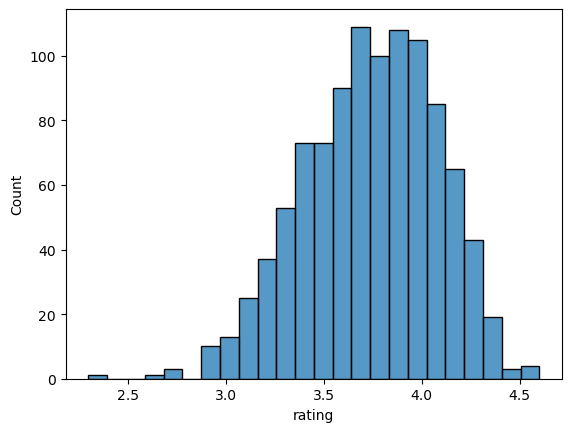

In [101]:
import seaborn as sns
sns.histplot(df['rating'])

In [102]:
# Define the bin edges
bin_edges = [0, 3.3, 3.7, 4.2, 5.0]

# Define the bin labels
bin_labels = [3, 3.5, 4, 4.5]

# Add a new column 'rating_binned' to the DataFrame with the binned values
df['rating_binned'] = pd.cut(df['rating'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['rating_binned'].value_counts()

In [104]:
# Define the bin edges
bin_edges = [0, 3.9, 5.0]

# Define the bin labels
bin_labels = [3, 4]

# Add a new column 'rating_binned' to the DataFrame with the binned values
df['rating_binned'] = pd.cut(df['rating'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['rating_binned'].value_counts()

3    696
4    324
Name: rating_binned, dtype: int64

In [108]:
driver.quit()

In [10]:
driver.find_elements(By.XPATH, 'a[@data-test="ceil-Reviews-url"]')

[]

In [9]:
driver.find_elements(By.XPATH, './/span[@class="css-u9lko5 euttuq60"]')[]

[<selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_165")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_166")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_167")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_168")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_169")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72feed2a419e4df", element="7F3ED2FDD6C005CEFB0CCEC82B7B08DD_element_170")>,
 <selenium.webdriver.remote.webelement.WebElement (session="456e6ddcc4becceea72fee

In [ ]:
driver.find_elements(By.XPATH, './/span[@class="css-u9lko5 euttuq60"

In [ ]:
for ele in driver.find_elements(By.XPATH, './/span[@class="css-u9lko5 euttuq60":
                                

In [72]:
driver.quit()

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
driver = webdriver.Chrome(service=service)
# List of company URLs
company_urls = [
    "https://www.glassdoor.com/Reviews/Amazon-Reviews-E6036.htm",
    "https://www.glassdoor.com/Reviews/Google-Reviews-E9079.htm",
    # Add more company URLs here
]
# Create a list to store data
data = []

names = []
ratings = []

# Initialize webdriver service
# Loop through company URLs
for company_url in company_urls:
    next_url = company_url
    company_data = {'Company': names,
                    'Ratings': ratings,
                    'Pros': '',
                    'Cons': ''}
    for i in range(1):
        driver = webdriver.Chrome(service=service)
        driver.get(next_url)
        ratings = [rating.text for rating
                   in driver.find_elements(By.XPATH, "//span[@data-test='rating']")]
        # Extract pros and cons
        pros = [pro.text for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']")]
        cons = [con.text for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']")]
        # Add to company_data
        company_data['Pros'] += ' '.join(pros)
        company_data['Cons'] += ' '.join(cons)
        try:
            # Try to click the pagination next button
            pagination_next = driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]')
            pagination_next.click()
            next_url = driver.current_url
        except:
            # If there's no next page, break the loop
            break
        driver.quit()
    data.append(company_data)
# Create a DataFrame from the collected data
df = pd.DataFrame(data)

In [6]:
df

,Company,Pros,Cons
0,https://www.glassdoor.com/Reviews/Amazon-Revie...,Gain useful experience and great benefits Real...,Not much room for advancement You have to be s...
1,https://www.glassdoor.com/Reviews/Google-Revie...,"Awesome Food, great talented coworkers, People...",i can not find any yet. Career opportunities a...


In [80]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page=1&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
# access company page
driver = webdriver.Chrome(service=service)
driver.get(url)

review_links = driver.find_elements(By.XPATH, '//span[@class="css-u9lko5 euttuq60"]')

# Find employer name tags
employer_names = driver.find_elements(By.XPATH, "//h2[@data-test='employer-short-name']")
# Find employer rating tags
employer_ratings = driver.find_elements(By.XPATH, "//span[@data-test='rating']")
names = []
ratings = []

# Extract names and ratings and add them to the lists
for name, rating in zip(employer_names, employer_ratings):
    names.append(name.text)
    ratings.append(rating.text)
    
review_urls = []
for ele in driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]'):
    review_urls.append(ele.get_attribute("href"))

# Create a list to store data
data = []
# Initialize webdriver service
# Loop through company URLs
for i, review_url in enumerate(review_urls):
    company_data = {'url': review_url,
                    'name': names[i],
                    'rating': ratings[i],
                    'pros': '',
                    'cons': ''}
    for i in range(1):
        driver = webdriver.Chrome(service=service)
        driver.get(review_url)
        # Extract pros and cons
        pros = [pro.text for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']")]
        cons = [con.text for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']")]
        # Add to company_data
        company_data['pros'] += ' '.join(pros)
        company_data['cons'] += ' '.join(cons)
        try:
            # Try to click the pagination next button
            pagination_next = driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]')
            pagination_next.click()
            next_url = driver.current_url
        except:
            # If there's no next page, break the loop
            break
        driver.quit()
    data.append(company_data)
# Create a DataFrame from the collected data
df = pd.DataFrame(data)

In [82]:
df.to_csv('../sample_raw_data.csv')

In [79]:
driver.quit()

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from selenium.webdriver.common.by import By


data = []

for page_number in range(1, 3):

    url = f"https://www.glassdoor.com/Reviews/index.htm?overall_rating_low=1&page={page_number}&locId=1&locType=N&locName=United%20States&filterType=RATING_OVERALL"
    # access company page
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service = service)
    driver.get(url)
    review_links = driver.find_elements(By.XPATH, '//span[@class="css-u9lko5 euttuq60"]')
    # Find employer name tags
    # Find employer rating tags
    

    review_urls = []
    for ele in driver.find_elements(By.XPATH, '//a[@data-test="cell-Reviews-url"]'):
        review_urls.append(ele.get_attribute("href"))
    # Create a list to store data
    
    # Initialize webdriver service
    # Loop through company URLs
    for i, review_url in enumerate(review_urls):
        company_data = {'url': review_url,
                        'pros': '',
                        'cons': ''}
        for i in range(1):
            driver = webdriver.Chrome(service=service)
            driver.get(review_url)
            # Extract pros and cons
            pros = [pro.text for pro in driver.find_elements(By.XPATH, "//span[@data-test='pros']")]
            cons = [con.text for con in driver.find_elements(By.XPATH, "//span[@data-test='cons']")]
            # Add to company_data
            company_data['pros'] += ' '.join(pros)
            company_data['cons'] += ' '.join(cons)
            try:
                # Try to click the pagination next button
                pagination_next = driver.find_element(By.XPATH, '//button[@data-test="pagination-next"]')
                pagination_next.click()
                next_url = driver.current_url
            except:
                # If there's no next page, break the loop
                print('error')
                break
            driver.quit()
        data.append(company_data)
# Create a DataFrame from the collected data
df = pd.DataFrame(data)
csv_filename = 'part1.csv'  # Change this to your desired filename
df.to_csv(csv_filename, index=False)